# Day 05 - Regression Models
## Sept. 22, 2020

<img src="./images/cmse.png"
     alt="CMSE logo"
     style="float: right; margin-left: 50px; width: 600px;" />

# Administrative

* **Tips from other students**:
 * We alternate speaking and sharing our screens as well as working through our questions/errors together. 
 * Share screens as it is a good way to work collaboratively and I find that I learn better when I see code visually instead of it being verbally explained to me
 * Start everything early. Then, you will find out which problems you need help on earlier and will be able to go to office hours. Office hours are really helpful especially now since they are so accessible.
* **Office Hours today**
 * DC might be 15 minutes late for 3pm office hours
* **Reminder about Pre-class**:
  * Due at 11:59pm before class
  * Credit only awarded if it's on time and completed thoughtfully


## Any questions?

# From Pre-Class Assignment

## Challenging bits

* How to make the random numbers work as expected
* The process for using `statsmodels`
* What do the graphs mean?

**You will get more practice with this today.**

## Things that are also important:

* What is a regression model?
* How does a regression model work?
* What are the concerns about fitting with a line (or other function)?
* How do we determine if the fit is good?

**We will work on this all week**

## Let's start by importing some data
### We will use the famous example from Anscombe

In [1]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

## Read data from Wikipedia's table of data
df = pd.read_html('https://en.wikipedia.org/wiki/Anscombe%27s_quartet',
                  match = 'Anscombe\'s quartet',
                  skiprows = 1)
df = df[0]
df

,x,y,x.1,y.1,x.2,y.2,x.3,y.3
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


## Let's just look at the data

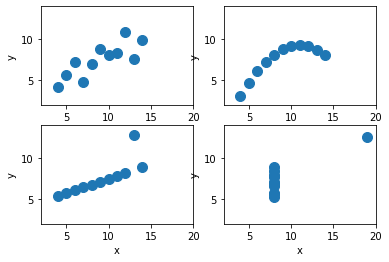

In [2]:
def plot_anscombe(x, y):
    
    plt.plot(x, y, 'o', markersize = 10)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.axis([2,20,2,14])

plt.subplot(221)
plot_anscombe(df['x'], df['y'])
plt.subplot(222)
plot_anscombe(df['x.1'], df['y.1'])
plt.subplot(223)
plot_anscombe(df['x.2'], df['y.2'])
plt.subplot(224)
plot_anscombe(df['x.3'], df['y.3'])

## Ok let's run an OLS model of this data and see what we get

In [3]:
import statsmodels.api as sm

x = pd.DataFrame(df['x'])      ## Make the independent variable
x_w_c = sm.add_constant(x)     ## Add a constant for the model (otherwise intercept is zero)
model = sm.OLS(df['y'], x_w_c) ## Make the OLS model for the dependent variable
results = model.fit()          ## Fit the model
print(results.params)          ## For this model, print the intercept and slope

const    3.000091
x        0.500091
dtype: float64


## Ok let's run this for all the data and see what we get
### We can make a function to do so for us and return the results object

In [4]:
def return_fit_parameters(x, y):
    
    x = pd.DataFrame(x)
    x_w_c = sm.add_constant(x)
    model = sm.OLS(y, x_w_c)
    results = model.fit()
    return results

## Now we can run it for each data set

In [5]:
set1 = return_fit_parameters(df['x'], df['y'])
print('Fit parameters for Set 1:\n', set1.params.round(2), '\n')

set2 = return_fit_parameters(df['x.1'], df['y.1'])
print('Fit parameters for Set 2:\n', set2.params.round(2), '\n')

set3 = return_fit_parameters(df['x.2'], df['y.2'])
print('Fit parameters for Set 3:\n', set3.params.round(2), '\n')

set4 = return_fit_parameters(df['x.3'], df['y.3'])
print('Fit parameters for Set 4:\n', set4.params.round(2), '\n')

Fit parameters for Set 1:
 const    3.0
x        0.5
dtype: float64 

Fit parameters for Set 2:
 const    3.0
x.1      0.5
dtype: float64 

Fit parameters for Set 3:
 const    3.0
x.2      0.5
dtype: float64 

Fit parameters for Set 4:
 const    3.0
x.3      0.5
dtype: float64 



## Anscombe's Data set are  (by design) fit by the same model
* Slope: 3.0
* Intercept 0.5

### We can use $R^2$ to measure the goodness of fit

In [6]:
print('RSqr for Set 1:', set1.rsquared.round(3), '\n')
print('RSqr for Set 2:', set2.rsquared.round(3), '\n')
print('RSqr for Set 3:', set3.rsquared.round(3), '\n')
print('RSqr for Set 4:', set4.rsquared.round(3), '\n')

RSqr for Set 1: 0.667 

RSqr for Set 2: 0.666 

RSqr for Set 3: 0.666 

RSqr for Set 4: 0.667 



## Ok, well they all fit pretty well. What is going on?

## Let's look at the fitted values and the real data in a scatter plot

In [7]:
def compare_data_and_fit(x, y, fit_y):
    
    plt.plot(x, y, 'o')
    plt.plot(x, fit_y, 'x')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.axis([2,20,2,14])
    plt.legend(['Data', 'Fitted Values'])

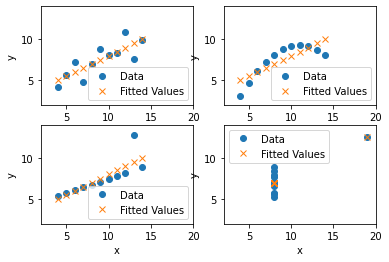

In [8]:
plt.subplot(221)
compare_data_and_fit(df['x'], df['y'], set1.fittedvalues)
plt.subplot(222)
compare_data_and_fit(df['x.1'], df['y.1'], set2.fittedvalues)
plt.subplot(223)
compare_data_and_fit(df['x.2'], df['y.2'], set3.fittedvalues)
plt.subplot(224)
compare_data_and_fit(df['x.3'], df['y.3'], set4.fittedvalues)

## Ok, now we see the problem. The fit is not good for the anything but the first set.

## Let's look  at comparing the fitted values to the real data
### If it was perfect we would expect a line

In [10]:
def compare_data_and_fittedvalues(y, fit_y):
    
    plt.plot(y, fit_y, 'x')
    plt.plot([0,20],[0,20], 'r-', lw = 2)
    plt.ylabel('Fitted Values')
    plt.xlabel('Data')
    plt.axis([2,14,2,14])

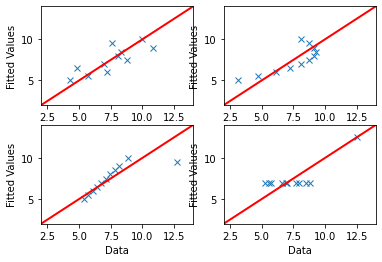

In [11]:
plt.subplot(221)
compare_data_and_fittedvalues(df['y'], set1.fittedvalues)
plt.subplot(222)
compare_data_and_fittedvalues(df['y.1'], set2.fittedvalues)
plt.subplot(223)
compare_data_and_fittedvalues(df['y.2'], set3.fittedvalues)
plt.subplot(224)
compare_data_and_fittedvalues(df['y.3'], set4.fittedvalues)

## Ok, now we see why our fits are not so good.

### Only the first set seems to be close to the 1:1 line

## Let's look at the residuals (the errors in the fits)

### If our fit is good, they should look randomly distributed 

In [12]:
def plot_residuals(x, resid):
    
    plt.plot(x, resid, 'o')
    plt.axhline(0, c = 'r', lw = 2)
    plt.xlabel('data')
    plt.ylabel('residuals')
    plt.axis([0,20,-2,2])

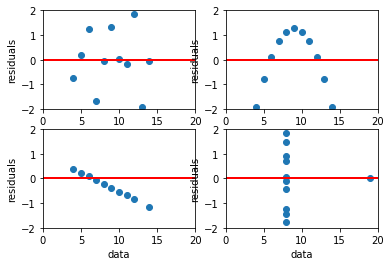

In [13]:
plt.subplot(221)
plot_residuals(df['x'], set1.resid)
plt.subplot(222)
plot_residuals(df['x.1'], set2.resid)
plt.subplot(223)
plot_residuals(df['x.2'], set3.resid)
plt.subplot(224)
plot_residuals(df['x.3'], set4.resid)

## Again only the first seems to be ok as the residuals are randomly distributed.

# Questions, Comments, Concerns?